<a href="https://colab.research.google.com/github/01Paras/desktop-tutorial/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# *The Data*




In [4]:
train = pd.read_csv("/content/titanic.csv")

In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Exploratory Data Analysis**

Let's begin some exploratory data analysis! We'll start by checking out missing data!

**Missing Data**

We can use seaborn to create a simple heatmap to see where we are missing data!

<Axes: >

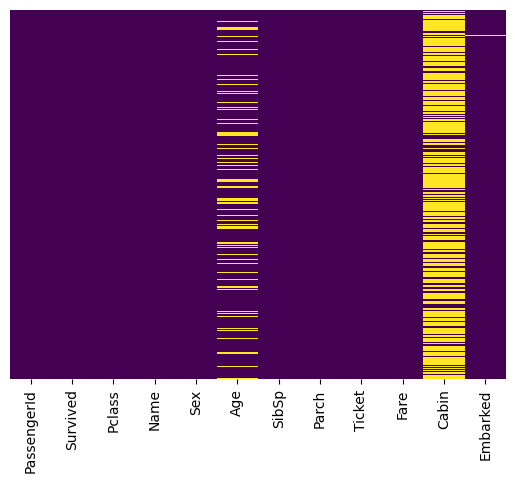

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
train.isnull().sum().sort_values(ascending=False)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some from of imputation.

Looking at the Cabin column, it looks like we are just missing too much of the data to do somthing useful with at a basic level.
We'll probably drop this later.

**Let's do some more visiualization of data**

<Axes: xlabel='Survived', ylabel='count'>

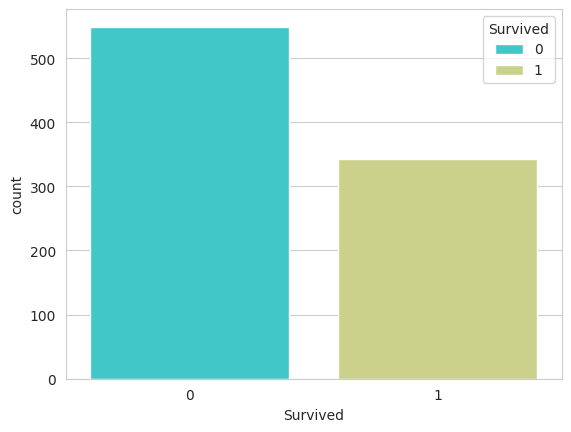

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,hue='Survived',palette='rainbow')

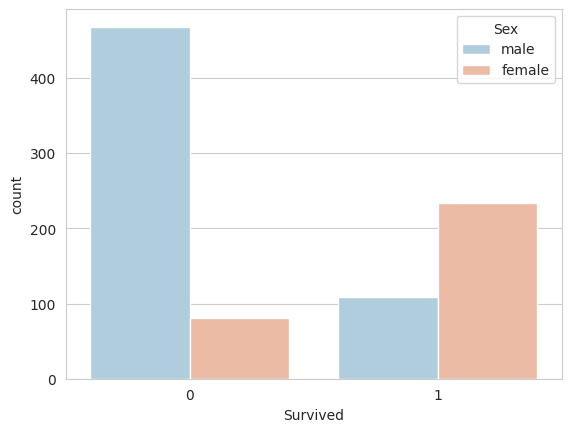

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data=train,palette='RdBu_r')
plt.show()

<Axes: >

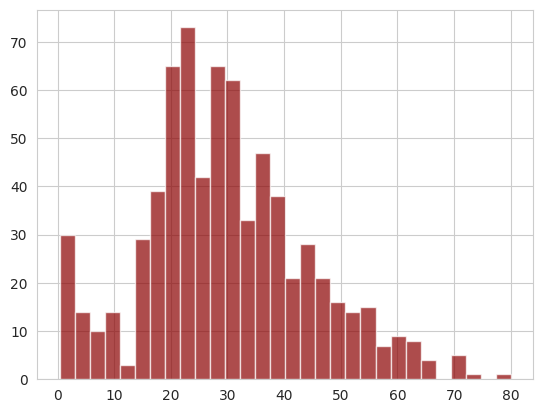

In [9]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

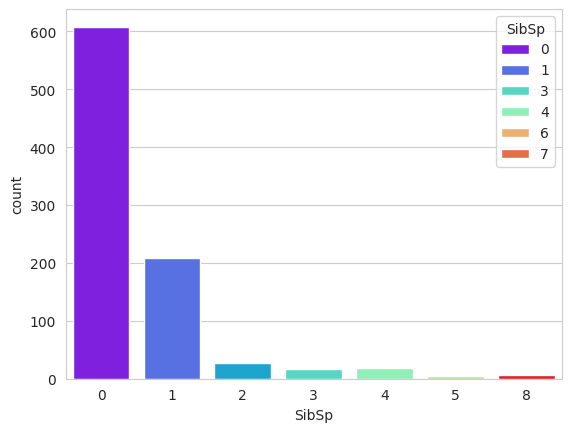

In [11]:
sns.countplot(x='SibSp',hue='SibSp',data=train,palette='rainbow')
plt.show()

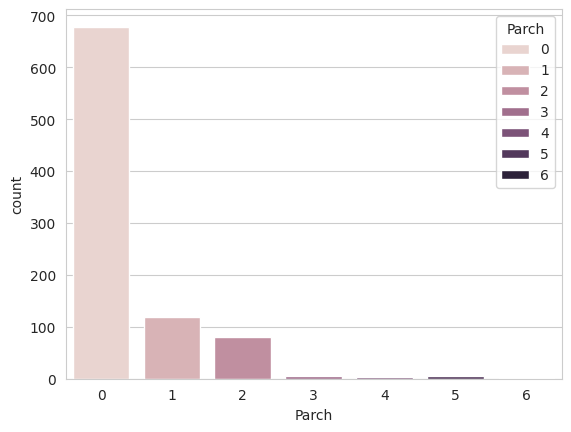

In [12]:
sns.countplot(x='Parch',hue='Parch',data=train)
plt.show()

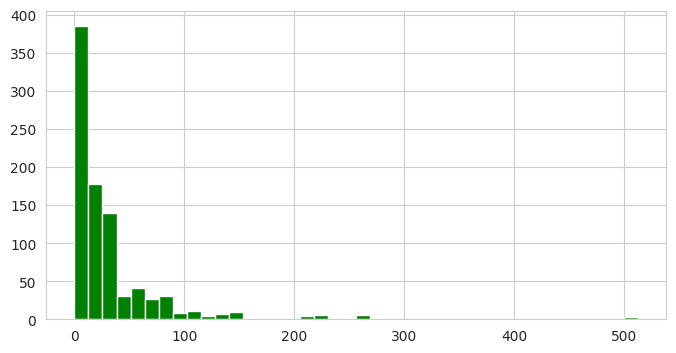

In [13]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))
plt.show()

**Data Cleaning,Data Manipulation and Data Organization**



/tmp/ipython-input-887861418.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


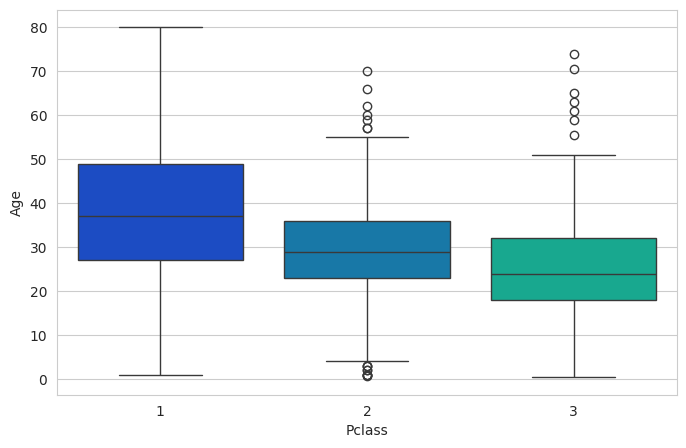

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
plt.show()

We can see the wealther passengers in the higher classes tend to be older, which makes sense.We'll use these average age values to impute based on Pclass for Age.









In [16]:
train['Age'].mean()

np.float64(29.69911764705882)

In [17]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [18]:
train['Age'].head(15)

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
5,29.699118
6,54.000000
7,2.000000
8,27.000000
9,14.000000


In [19]:
train['Age'].isnull().sum()

np.int64(0)

In [20]:
train['Embarked'] = train['Embarked'].fillna('S')

**Now let's check the heat map again**

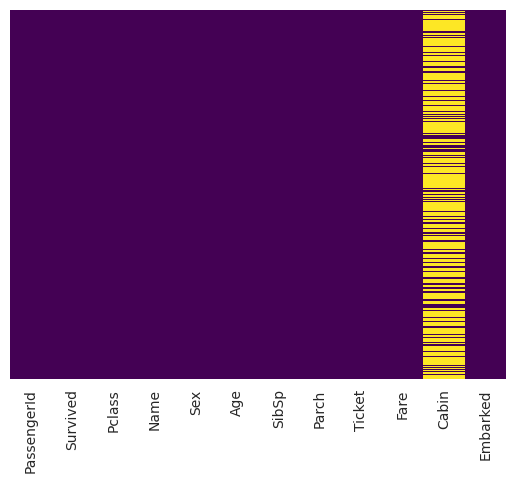

In [21]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [22]:
train.drop('Cabin',axis=1,inplace = True)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
train.dropna(inplace=True)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


**Converting Categorical features into the numerical features**

In [26]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

embarke = pd.get_dummies(train['Embarked'],drop_first=True)

In [27]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [28]:
train = pd.concat([train,sex,embarke],axis=1)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


**Train-Test-Split**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.10, random_state=42)

**Training And Predicting**

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
predictions = model.predict(X_test)
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
709,710,3,29.699118,1,1,15.2458,True,False,False
439,440,2,31.000000,0,0,10.5000,True,False,True
840,841,3,20.000000,0,0,7.9250,True,False,True
720,721,2,6.000000,0,1,33.0000,False,False,True
39,40,3,14.000000,1,0,11.2417,False,False,False


In [35]:
predictions

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0])

**Evaluation**

We need to check presion,recall,f1-score using classification report!

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(confusion_matrix(y_test,predictions))

[[45  9]
 [ 8 28]]


In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        54
           1       0.76      0.78      0.77        36

    accuracy                           0.81        90
   macro avg       0.80      0.81      0.80        90
weighted avg       0.81      0.81      0.81        90

